In [1]:
# import libraries to work with


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension, management, asset management and payments services, headquartered in London, UK.

#### Problem
Blossom Bank wants to build a Machine Learning model to predict online payment.


#### Data Dictionary

The dataset provided shows the following:

• step: represents a unit of time where 1 step equals 1hour
• type: type of online transaction
• amount: the amount of the transaction
• nameOrig: customer starting the transaction
• oldbalanceOrg: balance before the transaction
• newbalanceOrig: balance after the transaction
• nameDest: recipient of the transaction
• oldbalanceDest: initial balance of recipient before the transaction
• newbalanceDest: the new balance of the
recipient after the transaction
• isFraud: fraud transaction


An Exploratory data analysis will be used to understand the relationship of the various parameters that can be derived from the dataset.

Machine Learning will be used to determine the rate of fraud carried out in the bank. This will enable Blossom bank to know how exposed their online payment system are and this will help them beef up their various online payment security. 

In [2]:
##load dataset from csv using the read_csv() method of pandas

online_payment = pd.read_csv('Online Payment Fraud Detection.csv')

## Understanding the dataset

In [3]:
#view the top few rows of the data set with the head() method

online_payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
#view the bottom rows of the data set with the tail() method

online_payment.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [5]:
#the shape attribute 

online_payment.shape

(1048575, 10)

In [6]:
#the info of the data

online_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
#the view the column of the data

online_payment.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
#the summary statistics of the data

online_payment.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


## Data wrangling

some of the column names will be changed to give a better understanding

nameOrig  -      cust_name,  
oldbalanceOrg -  cust_oldbal,  
newbalanceOrig - cust_newbal,  
nameDest      -  fraud_name,  
oldbalanceDest  - fraud_oldbal,  
newbalanceDest   -fraud_newbal


In [9]:
online_payment.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
#renaming some column names for better understanding

online_payment.rename(columns = {'nameOrig':'cust_name', 'oldbalanceOrg':'cust_oldbal', 'newbalanceOrig':'cust_newbal',
                                 'nameDest':'fraud_name','oldbalanceDest':'fraud_oldbal','newbalanceDest':'fraud_newbal'}, inplace = True)


online_payment.head()

,step,type,amount,cust_name,cust_oldbal,cust_newbal,fraud_name,fraud_oldbal,fraud_newbal,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [11]:
#checking the missing data, from below we can see we dont have any missing data

online_payment.isna().sum()

step            0
type            0
amount          0
cust_name       0
cust_oldbal     0
cust_newbal     0
fraud_name      0
fraud_oldbal    0
fraud_newbal    0
isFraud         0
dtype: int64

## EXPLORATORY DATA ANALYSIS

### Relationships and key features

In [12]:
online_payment.head()

,step,type,amount,cust_name,cust_oldbal,cust_newbal,fraud_name,fraud_oldbal,fraud_newbal,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## Explore Correlations

In [13]:
#checking the correlations

online_payment.corr()

,step,amount,cust_oldbal,cust_newbal,fraud_oldbal,fraud_newbal,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
cust_oldbal,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
cust_newbal,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
fraud_oldbal,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
fraud_newbal,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

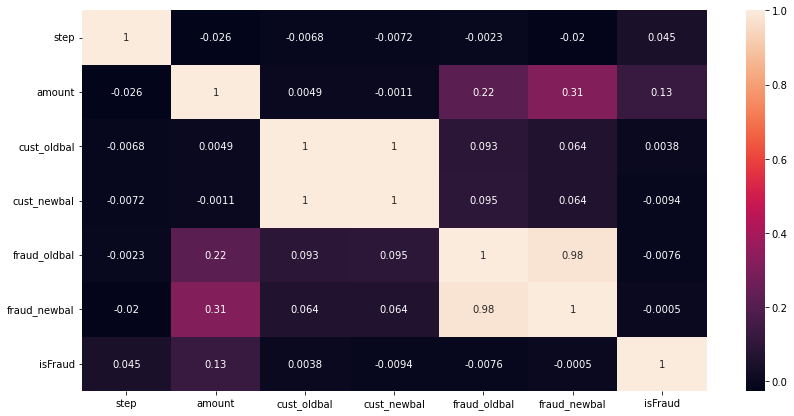

In [14]:
#correlation using heatmap

plt.figure(figsize=(14,7))

sns.heatmap(online_payment.corr(),annot=True)

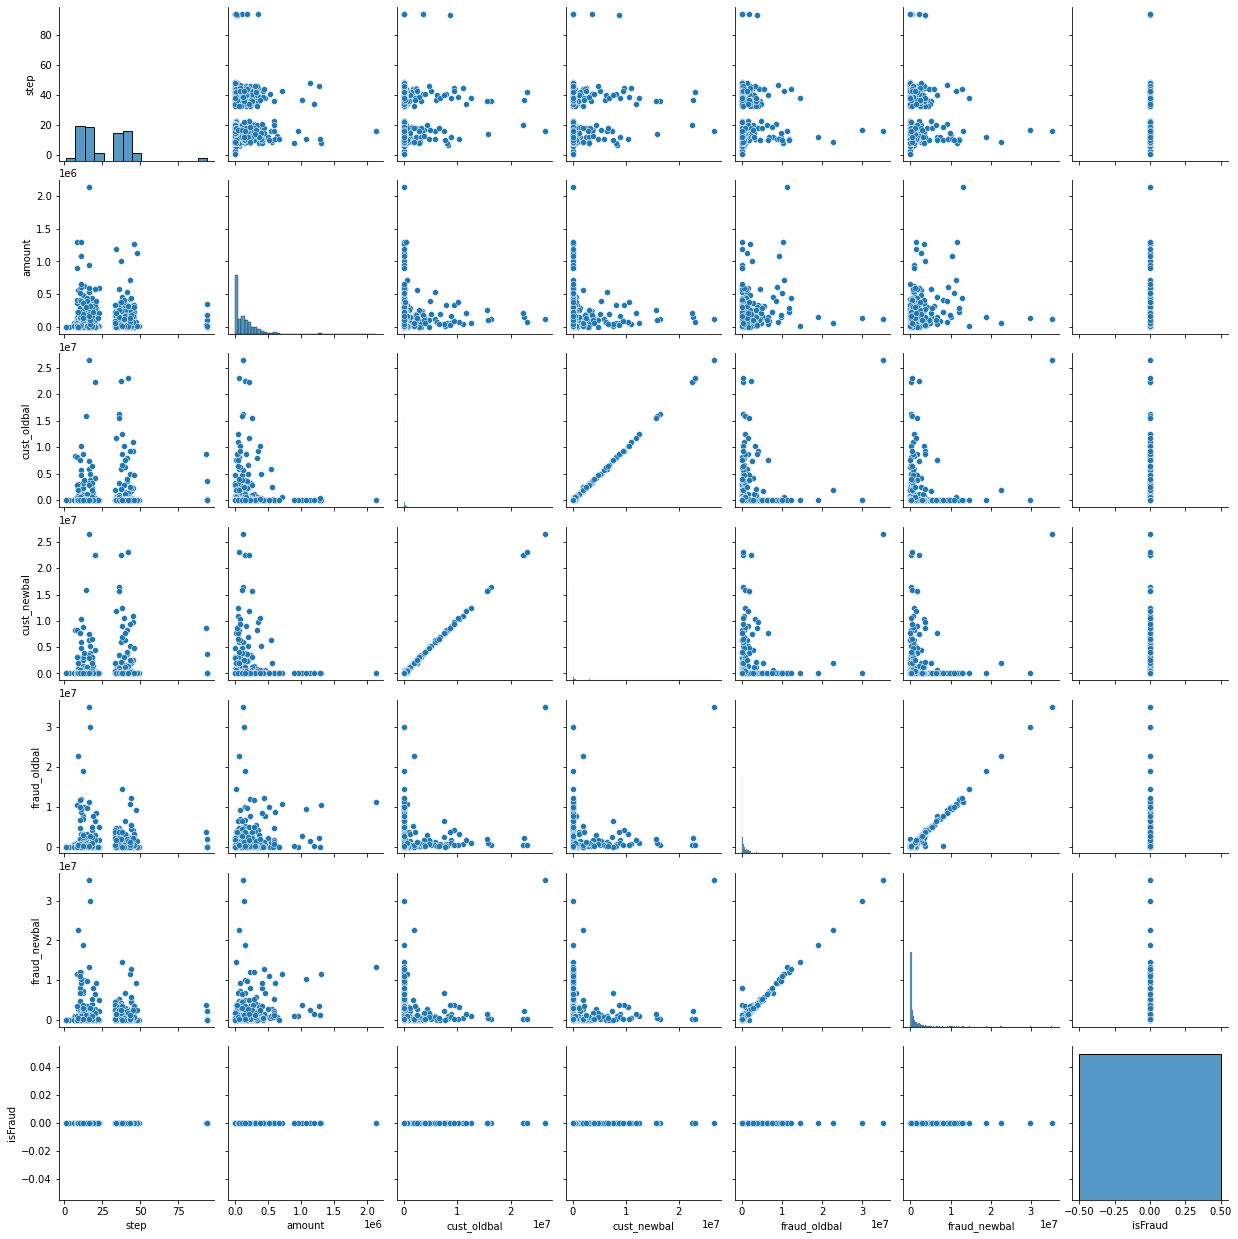

In [15]:
#visualize correlation a using seaborn pairplot

sns.pairplot(online_payment.sample(500))
plt.show()

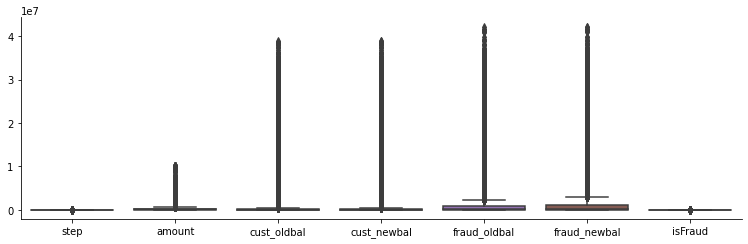

In [16]:
#visualize correlation using catplot

sns.catplot(data=online_payment,kind='box',aspect=3,height=3.5)


### Analysis

In [17]:
#total fraud attempted

online_payment.isFraud.count()

1048575

In [18]:
#total number of successful fraud and unsuccessful fraud

print('No of fraud transactions:{}, \n No of non-fraud transactions:{}'.format((online_payment.isFraud==1).sum(),
                                                                               
    (online_payment.isFraud==0).sum()))



No of fraud transactions:1142, 
 No of non-fraud transactions:1047433


Text(0.5, 1.0, 'Fraud Ratio')

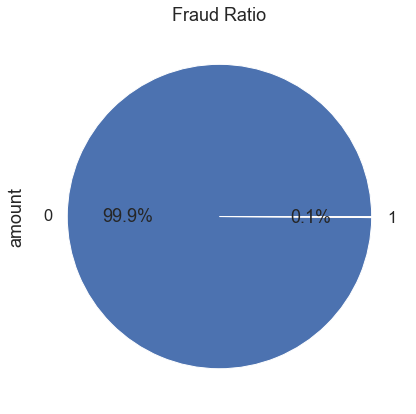

In [19]:
#using pie chart to visualize the fraud


#groupby the data by fraud

fraud=online_payment.groupby('isFraud').amount.count()



sns.set_theme(font_scale=1.5)

fraud.plot.pie(autopct="%.1f%%", figsize=(7, 7)).set_title("Fraud Ratio")




### the amount of successful fraud was 0.1% of the total amount involved in the fraud

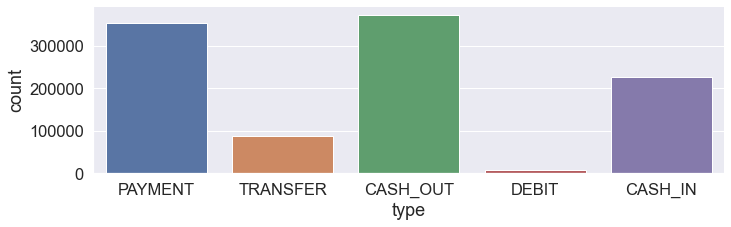

In [20]:
#using bar chart to visualize the number of transaction by payment type

sns.set_theme(font_scale=1.5)
        
          
sns.catplot(x = "type", kind="count", data = online_payment,aspect=3,height=3.5)

### attempted fraud carried out was highest in the cash_out mode of payment

In [21]:
#online transactions mode of payment with the highest Fraud(type against ifraud)



paymthd = online_payment.groupby('type').isFraud.count().sort_values(ascending=False)[:5]

paymthd

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'Payment Method By No. Fraud Attempted')

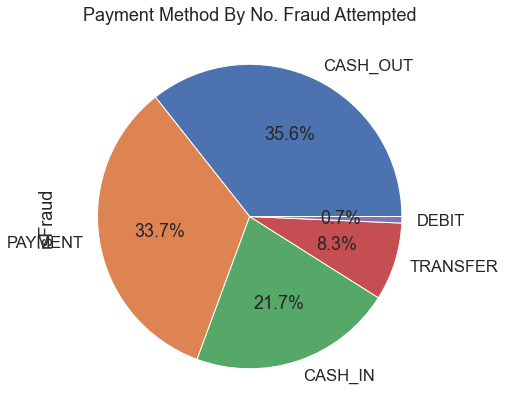

In [22]:
#checking the ratio using a piechart for the highest fraud on the payment type
sns.set_theme(font_scale=1.5)


paymthd.plot.pie(autopct="%.1f%%",figsize=(7,7)).set_title("Payment Method By No. Fraud Attempted")

### using the pie-chart, we can see it's 35.6% atempted fraud on the cash_out, which was closely followed by the payment method

In [23]:
#online transactions mode of payment with the highest amount(type against ifraud)



paymthd_amt = online_payment.groupby('type').amount.sum().sort_values(ascending=False)[:5]

paymthd_amt

type
CASH_OUT    6.876474e+10
TRANSFER    5.503644e+10
CASH_IN     3.859476e+10
PAYMENT     3.936097e+09
DEBIT       4.219599e+07
Name: amount, dtype: float64

<AxesSubplot:title={'center':'Transaction Type by Amount'}, xlabel='type', ylabel='amount'>

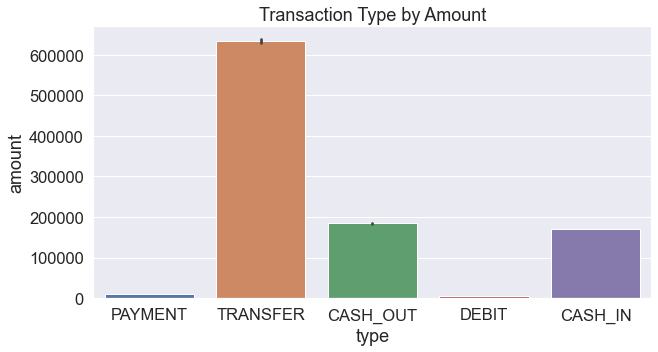

In [24]:
#online transactions mode of payment with the highest amount(type against ifraud)

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,5))
plt.title("Transaction Type by Amount")

sns.barplot(x = online_payment.type, y = online_payment.amount)

### the transfer mode of payment is the highest when the amount was involved

<AxesSubplot:title={'center':'Transaction Type by Amount and Fraud'}, xlabel='amount', ylabel='type'>

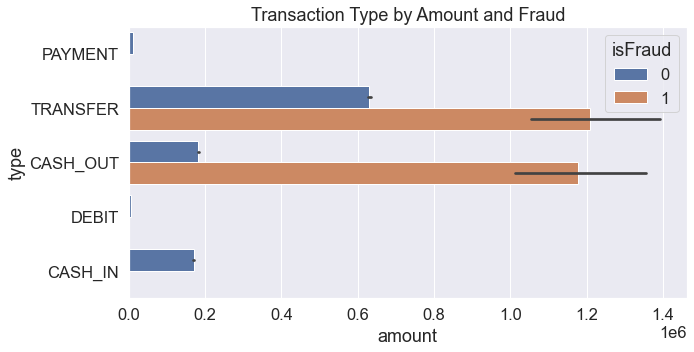

In [25]:
#transaction type by amount and fraud

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,5))
plt.title("Transaction Type by Amount and Fraud")
sns.barplot(y=online_payment.type, x=online_payment.amount, hue=online_payment.isFraud)

### the transfer method has the highest succesful fraud, followed closely by the cash_out method

<AxesSubplot:title={'center':'Transaction Type by fraud_newbal and Fraud'}, xlabel='fraud_newbal', ylabel='type'>

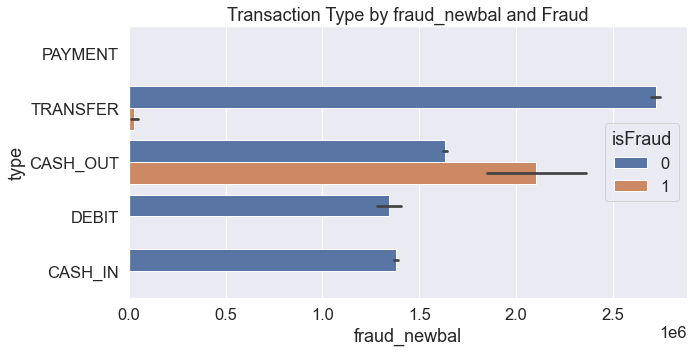

In [26]:
#transaction type by fraud new balance and fraud

sns.set_theme(font_scale=1.5)
plt.figure(figsize=(10,5))
plt.title("Transaction Type by fraud_newbal and Fraud")
sns.barplot(y=online_payment.type, x=online_payment.fraud_newbal, hue=online_payment.isFraud)

### the fraudsters earned more from the cash_out method

## Feature Engineering

In [27]:
online_payment.head()

,step,type,amount,cust_name,cust_oldbal,cust_newbal,fraud_name,fraud_oldbal,fraud_newbal,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [28]:
#1. select categorical variables
#replace pass with your code

categorical = ['type']


In [29]:
#2. use pd.get_dummies() for one hot encoding
#replace pass with your code

categories_dummies = pd.get_dummies(online_payment[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [30]:
#3 join the encoded variables back to the main dataframe using pd.concat()

newonline_pymt = pd.concat([online_payment,categories_dummies] ,axis=1)

#check what you have done
print(newonline_pymt.shape)


(1048575, 15)


In [31]:
newonline_pymt.head()

,step,type,amount,cust_name,cust_oldbal,cust_newbal,fraud_name,fraud_oldbal,fraud_newbal,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [32]:
online_payment.shape

(1048575, 10)

In [39]:
data=newonline_pymt.drop(categorical,axis=1)
data.head()

,step,amount,cust_name,cust_oldbal,cust_newbal,fraud_name,fraud_oldbal,fraud_newbal,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


### Model Selection Training and validation

Select Target
Your target is the column you want to predict.



Choose your target
TODO:

select isFraud column as y
set X as newonline_pymt except the isFraud column.
You can use drop() to remove cust_name,fraud_name

In [40]:
y = data['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [43]:
X=data.drop(columns=['isFraud','cust_name', 'fraud_name'],axis=1)
X.head()

,step,amount,cust_oldbal,cust_newbal,fraud_oldbal,fraud_newbal,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


### Preparing the models

In [37]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [44]:
#split into training and validation sets using a 40% split ratio
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)

In [45]:
# TODO: initialize logistic regression
LR = LogisticRegression(random_state=42)

In [46]:
#TODO: initialize k neighbors
KN = KNeighborsClassifier()

In [47]:
#TODO: initialize decision tree
DC = DecisionTreeClassifier(random_state=42)


In [48]:
#TODO: initialize random forest
RF = RandomForestClassifier(random_state=42)

In [49]:
#create list of your model names
models = [LR,KN, DC,RF]

In [50]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_valid,y_valid):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(models.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction,y_valid))

In [51]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)


For LogisticRegression, Accuracy score is 0.9989771833202203 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419144
           1       0.35      0.56      0.43       286

    accuracy                           1.00    419430
   macro avg       0.67      0.78      0.71    419430
weighted avg       1.00      1.00      1.00    419430


For KNeighborsClassifier, Accuracy score is 0.9992942803328326 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419103
           1       0.53      0.76      0.63       327

    accuracy                           1.00    419430
   macro avg       0.77      0.88      0.81    419430
weighted avg       1.00      1.00      1.00    419430


For DecisionTreeClassifier, Accuracy score is 0.9995470042676966 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418955
           1       0.81      0.79      

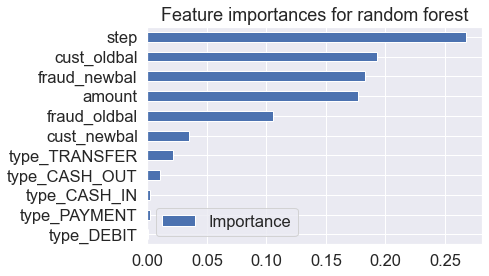

In [56]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[::].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [61]:
#get these top 10 importances
RF_importances[::].sort_values(by='Importance').index.values

array(['type_DEBIT', 'type_PAYMENT', 'type_CASH_IN', 'type_CASH_OUT',
       'type_TRANSFER', 'cust_newbal', 'fraud_oldbal', 'amount',
       'fraud_newbal', 'cust_oldbal', 'step'], dtype=object)

### LogisticRegression has a better precision, the means Blossom Bank fraud has low successful fraud in the various payment types.

From the features of importances for random forest analysis, we can see the top 3 important keys to note are:

1. Step(time used in consumating a transaction): fraud can be prevented if reported timely, and this can reduce successful fraud happening

2. Cust_oldbal(customer's old balance): customer's fund have to be protected, to avoid loss of fund and customer to the bank.
The bank will have to create awareness and how to prevent fraud, and in eventuality that it happened steps to take to report it timely

3. fraud_newbal(fraudster new balance): the bank should put in place abnormalities in customers account whereby once an account receives an inflow that is different from the usual, a hold should be placed until the source of inflow is verified.